In [6]:
import pandas as pd
import numpy as np
data = pd.read_csv('weather.csv')
print(data)

            date  precipitation  temp_max  temp_min  wind  weather
0     2012-01-01            0.0      12.8       5.0   4.7  drizzle
1     2012-01-02           10.9      10.6       2.8   4.5     rain
2     2012-01-03            0.8      11.7       7.2   2.3     rain
3     2012-01-04           20.3      12.2       5.6   4.7     rain
4     2012-01-05            1.3       8.9       2.8   6.1     rain
...          ...            ...       ...       ...   ...      ...
1456  2015-12-27            8.6       4.4       1.7   2.9     rain
1457  2015-12-28            1.5       5.0       1.7   1.3     rain
1458  2015-12-29            0.0       7.2       0.6   2.6      fog
1459  2015-12-30            0.0       5.6      -1.0   3.4      sun
1460  2015-12-31            0.0       5.6      -2.1   3.5      sun

[1461 rows x 6 columns]


In [11]:
pd.DataFrame(data)
data

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [17]:
data.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

<Axes: >

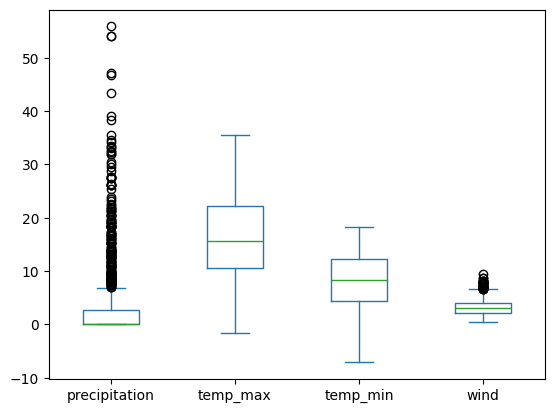

In [24]:
data.plot.box()

<Axes: >

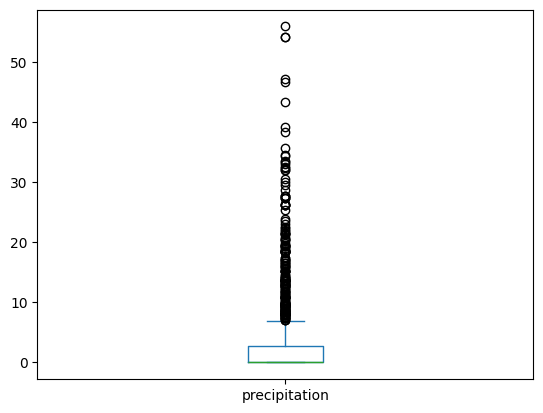

In [28]:
data.precipitation.plot.box()

In [26]:
def detect_outlier(feature):
    Q1 = feature.quantile(0.25)
    Q3 = feature.quantile(0.75)
    
    IQR = Q3-Q1
    
    lower_bound = Q1-(1.5*IQR)
    upper_bound = Q3+(1.5*IQR)
    
    return feature.index[(feature<lower_bound)|(feature>upper_bound)].tolist()

In [31]:
# Define numerical columns to check for outliers
num_cols = ['precipitation', 'temp_max', 'temp_min', 'wind']

# Check outliers for each numerical column
for col in num_cols:
    print(col,'-->',detect_outlier(data[col]))


precipitation --> [1, 3, 16, 17, 18, 19, 23, 24, 28, 31, 43, 47, 52, 54, 69, 70, 71, 72, 73, 74, 75, 76, 88, 90, 106, 109, 115, 123, 141, 156, 158, 173, 174, 201, 287, 288, 291, 295, 297, 300, 302, 303, 304, 305, 308, 315, 322, 323, 325, 327, 334, 336, 337, 338, 346, 348, 350, 353, 354, 359, 373, 374, 393, 418, 424, 430, 431, 443, 444, 445, 459, 460, 461, 462, 465, 467, 468, 474, 506, 507, 512, 539, 541, 606, 613, 614, 630, 636, 637, 638, 639, 649, 671, 676, 687, 721, 737, 738, 741, 758, 759, 771, 772, 775, 776, 777, 778, 779, 785, 791, 792, 793, 794, 797, 799, 804, 805, 817, 818, 836, 837, 839, 842, 843, 844, 853, 854, 858, 934, 954, 955, 972, 996, 997, 999, 1014, 1016, 1017, 1018, 1021, 1023, 1025, 1026, 1031, 1033, 1034, 1037, 1055, 1057, 1059, 1062, 1070, 1072, 1073, 1074, 1082, 1084, 1087, 1099, 1100, 1110, 1112, 1113, 1128, 1130, 1131, 1132, 1133, 1152, 1153, 1168, 1169, 1177, 1178, 1195, 1198, 1319, 1321, 1336, 1337, 1375, 1378, 1393, 1398, 1399, 1400, 1406, 1411, 1412, 1413, 14

In [32]:
# Cap outliers with median for numerical columns
for col in num_cols:
    # Get outlier indices
    outlier_indices = detect_outlier(data[col])
    
    # Replace outliers with median if any found
    if outlier_indices:
        median_value = data[col].median()
        data.loc[outlier_indices, col] = median_value

# Verify outliers have been capped
for col in num_cols:
    print(f"Outliers in {col} after capping:", len(detect_outlier(data[col])))


Outliers in precipitation after capping: 323
Outliers in temp_max after capping: 0
Outliers in temp_min after capping: 0
Outliers in wind after capping: 9


In [33]:
# Define numerical columns to check for outliers 
num_cols = ['precipitation', 'temp_max', 'temp_min', 'wind']

# Check outliers for each numerical column and cap with mean
for col in num_cols:
    # Get outlier indices
    outlier_indices = detect_outlier(data[col])
    
    # Replace outliers with mean if any found
    if outlier_indices:
        mean_value = data[col].mean()
        data.loc[outlier_indices, col] = mean_value

# Verify outliers have been capped
for col in num_cols:
    print(f"Outliers in {col} after capping with mean:", len(detect_outlier(data[col])))


Outliers in precipitation after capping with mean: 0
Outliers in temp_max after capping with mean: 0
Outliers in temp_min after capping with mean: 0
Outliers in wind after capping with mean: 0


<Axes: >

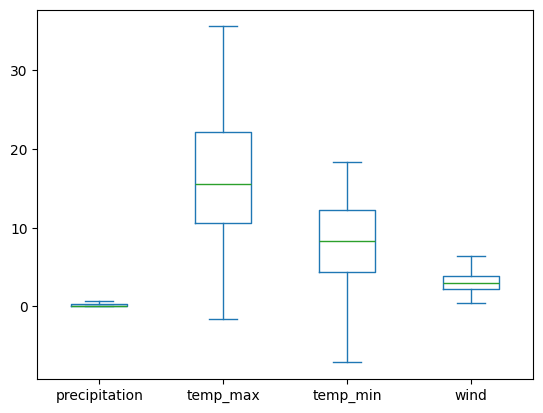

In [34]:
data.plot.box()

In [46]:
pd.DataFrame(data)

,date,precipitation,temp_max,temp_min,wind,weather_encoded,weather_drizzle,weather_fog,weather_rain,weather_snow,weather_sun
0,2012-01-01,0.000000,12.8,5.0,4.7,0,True,False,False,False,False
1,2012-01-02,0.000000,10.6,2.8,4.5,2,False,False,True,False,False
2,2012-01-03,0.698426,11.7,7.2,2.3,2,False,False,True,False,False
3,2012-01-04,0.000000,12.2,5.6,4.7,2,False,False,True,False,False
4,2012-01-05,0.698426,8.9,2.8,6.1,2,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1456,2015-12-27,0.000000,4.4,1.7,2.9,2,False,False,True,False,False
1457,2015-12-28,0.698426,5.0,1.7,1.3,2,False,False,True,False,False
1458,2015-12-29,0.000000,7.2,0.6,2.6,1,False,True,False,False,False
1459,2015-12-30,0.000000,5.6,-1.0,3.4,4,False,False,False,False,True


In [47]:
data.isna().sum()

date               0
precipitation      0
temp_max           0
temp_min           0
wind               0
weather_encoded    0
weather_drizzle    0
weather_fog        0
weather_rain       0
weather_snow       0
weather_sun        0
dtype: int64

In [48]:
# Drop the weather_encoded column
data = data.drop('weather_encoded', axis=1)


In [49]:
data

,date,precipitation,temp_max,temp_min,wind,weather_drizzle,weather_fog,weather_rain,weather_snow,weather_sun
0,2012-01-01,0.000000,12.8,5.0,4.7,True,False,False,False,False
1,2012-01-02,0.000000,10.6,2.8,4.5,False,False,True,False,False
2,2012-01-03,0.698426,11.7,7.2,2.3,False,False,True,False,False
3,2012-01-04,0.000000,12.2,5.6,4.7,False,False,True,False,False
4,2012-01-05,0.698426,8.9,2.8,6.1,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...
1456,2015-12-27,0.000000,4.4,1.7,2.9,False,False,True,False,False
1457,2015-12-28,0.698426,5.0,1.7,1.3,False,False,True,False,False
1458,2015-12-29,0.000000,7.2,0.6,2.6,False,True,False,False,False
1459,2015-12-30,0.000000,5.6,-1.0,3.4,False,False,False,False,True


In [52]:
data['weather_drizzle']=data['weather_drizzle'].astype(int)
data['weather_fog']=data['weather_fog'].astype(int)
data['weather_rain']=data['weather_rain'].astype(int)
data['weather_snow']=data['weather_snow'].astype(int)
data['weather_sun']=data['weather_sun'].astype(int)

data

,date,precipitation,temp_max,temp_min,wind,weather_drizzle,weather_fog,weather_rain,weather_snow,weather_sun
0,2012-01-01,0.000000,12.8,5.0,4.7,1,0,0,0,0
1,2012-01-02,0.000000,10.6,2.8,4.5,0,0,1,0,0
2,2012-01-03,0.698426,11.7,7.2,2.3,0,0,1,0,0
3,2012-01-04,0.000000,12.2,5.6,4.7,0,0,1,0,0
4,2012-01-05,0.698426,8.9,2.8,6.1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1456,2015-12-27,0.000000,4.4,1.7,2.9,0,0,1,0,0
1457,2015-12-28,0.698426,5.0,1.7,1.3,0,0,1,0,0
1458,2015-12-29,0.000000,7.2,0.6,2.6,0,1,0,0,0
1459,2015-12-30,0.000000,5.6,-1.0,3.4,0,0,0,0,1


In [54]:
# Convert date column to datetime type if not already
data['date'] = pd.to_datetime(data['date'])

# Calculate days difference from present date
present_date = pd.Timestamp.now()
data['days_from_present'] = (present_date - data['date']).dt.days

# Extract day name from date
data['day_name'] = data['date'].dt.day_name()

# Create weekend indicator
data['is_weekend'] = data['day_name'].isin(['Saturday', 'Sunday'])

# Display first few rows to verify
print("\nFirst few rows with new date features:")
print(data[['date', 'days_from_present', 'day_name', 'is_weekend']].head())



First few rows with new date features:
        date  days_from_present   day_name  is_weekend
0 2012-01-01               4848     Sunday        True
1 2012-01-02               4847     Monday       False
2 2012-01-03               4846    Tuesday       False
3 2012-01-04               4845  Wednesday       False
4 2012-01-05               4844   Thursday       False


In [55]:
data

,date,precipitation,temp_max,temp_min,wind,weather_drizzle,weather_fog,weather_rain,weather_snow,weather_sun,days_from_present,day_name,is_weekend
0,2012-01-01,0.000000,12.8,5.0,4.7,1,0,0,0,0,4848,Sunday,True
1,2012-01-02,0.000000,10.6,2.8,4.5,0,0,1,0,0,4847,Monday,False
2,2012-01-03,0.698426,11.7,7.2,2.3,0,0,1,0,0,4846,Tuesday,False
3,2012-01-04,0.000000,12.2,5.6,4.7,0,0,1,0,0,4845,Wednesday,False
4,2012-01-05,0.698426,8.9,2.8,6.1,0,0,1,0,0,4844,Thursday,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,2015-12-27,0.000000,4.4,1.7,2.9,0,0,1,0,0,3392,Sunday,True
1457,2015-12-28,0.698426,5.0,1.7,1.3,0,0,1,0,0,3391,Monday,False
1458,2015-12-29,0.000000,7.2,0.6,2.6,0,1,0,0,0,3390,Tuesday,False
1459,2015-12-30,0.000000,5.6,-1.0,3.4,0,0,0,0,1,3389,Wednesday,False


In [56]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = data.drop(['date', 'day_name'], axis=1) # Dropping non-numeric columns
y = data['precipitation'] # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print shapes to verify the split
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (1168, 11)
Testing set shape: (293, 11)


In [63]:
# Import necessary libraries
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create and train the KNN model
knn = KNeighborsRegressor(n_neighbors=9)  # You can adjust n_neighbors as needed
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Since this is a regression problem, we need to convert to binary classification
# to calculate classification metrics
threshold = 0.5  # You can adjust this threshold
y_test_binary = y_test > threshold
y_pred_binary = y_pred > threshold

# Calculate classification metrics
accuracy = accuracy_score(y_test_binary, y_pred_binary)
precision = precision_score(y_test_binary, y_pred_binary)
recall = recall_score(y_test_binary, y_pred_binary)
f1 = f1_score(y_test_binary, y_pred_binary)

print("\nModel Performance Metrics:")
print("-------------------------")
print(f"Accuracy Score: {accuracy:.4f}")
print(f"Precision Score: {precision:.4f}")
print(f"Recall Score: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")



Model Performance Metrics:
-------------------------
Accuracy Score: 0.7611
Precision Score: 0.4286
Recall Score: 0.0435
F1 Score: 0.0789
